In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 4. 离散傅里叶变换

## 4.1 如何获得图像的幅度谱和相位谱

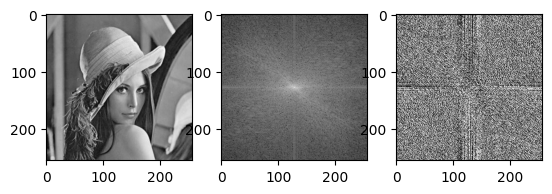

In [28]:
image = cv2.imread('./png_files/lena.png', 0)

# 进行float32形式转换
float32_image = image.astype(np.float32)

# 使用cv2.dft进行傅里叶变化
dft_image = cv2.dft(float32_image, flags=cv2.DFT_COMPLEX_OUTPUT)

# 使用np.fft.shiftfft()将变化后的图像的低频转移到中心位置
dft_image_ce = np.fft.fftshift(dft_image)

# 计算幅度谱
amplitude = cv2.magnitude(dft_image_ce[:, :, 0], dft_image_ce[:, :, 1])
amplitude = np.log(1 + amplitude)
amplitude = cv2.normalize(amplitude, amplitude, 0, 255, cv2.NORM_MINMAX)
amplitude = amplitude.astype(np.uint8)

# 计算相位谱
phase = cv2.phase(dft_image_ce[:,:,1], dft_image_ce[:,:,0])
phase = cv2.normalize(phase, phase, 0, 255, cv2.NORM_MINMAX)
phase = phase.astype(np.uint8)

# 画图
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(amplitude, cmap='gray')
plt.subplot(133)
plt.imshow(phase, cmap='gray')
plt.show()

## 4.2 幅度谱的理解

In [32]:
cv2.namedWindow('Image', 0)
cv2.namedWindow('FFT-Amplitude', 0)

image = cv2.imread('./png_files/amp1.png', 0)  # amp1.png ~ amp7.png + lena.png

float32_image = image.astype(np.float32)

dft_image = cv2.dft(float32_image, flags=cv2.DFT_COMPLEX_OUTPUT)

dft_image_ce = np.fft.fftshift(dft_image)

# 计算幅度谱
amplitude = cv2.magnitude(dft_image_ce[:, :, 0], dft_image_ce[:, :, 1])
# amplitude = np.log(1 + amplitude)
amplitude = cv2.normalize(amplitude, amplitude, 0, 255, cv2.NORM_MINMAX)
amplitude = amplitude.astype(np.uint8)

# 画图
cv2.imshow('Image', image)
cv2.imshow('FFT-Amplitude', amplitude)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4.3 相位谱的理解

In [34]:
cv2.namedWindow('Image', 0)
cv2.namedWindow('FFT-Phase', 0)

image = cv2.imread('./png_files/ph2.png', 0)  # ph1.png ~ ph2.png

float32_image = image.astype(np.float32)

dft_image = cv2.dft(float32_image, flags=cv2.DFT_COMPLEX_OUTPUT)

dft_image_ce = np.fft.fftshift(dft_image)

# 计算相位谱
phase = cv2.phase(dft_image_ce[:,:,1], dft_image_ce[:,:,0])
# phase = np.log(1 + phase)
phase = cv2.normalize(phase, phase, 0, 255, cv2.NORM_MINMAX)
phase = phase.astype(np.uint8)

# 画图
cv2.imshow('Image', image)
cv2.imshow('FFT-Phase', phase)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4.4 相位谱与幅度谱的交换

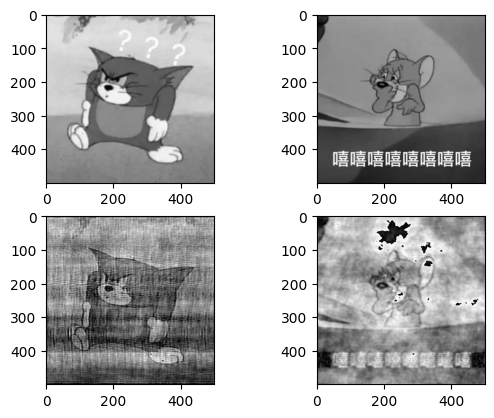

In [3]:
tom = cv2.imread('./png_files/switch-tom.png',0)
jerry = cv2.imread('./png_files/switch-jerry.png',0)

float32_tom = tom.astype(np.float32)
dft_tom = cv2.dft(float32_tom, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_tom_ce = np.fft.fftshift(dft_tom)

float32_jerry = jerry.astype(np.float32)
dft_jerry = cv2.dft(float32_jerry, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_jerry_ce = np.fft.fftshift(dft_jerry)

# 计算幅度谱
tom_amplitude = cv2.magnitude(dft_tom_ce[:, :, 0], dft_tom_ce[:, :, 1])
jerry_amplitude = cv2.magnitude(dft_jerry_ce[:, :, 0], dft_jerry_ce[:, :, 1])

# 计算相位谱
tom_phase = cv2.phase(dft_tom_ce[:,:,1], dft_tom_ce[:,:,0])
jerry_phase = cv2.phase(dft_jerry_ce[:,:,1], dft_jerry_ce[:,:,0])

# 将 汤姆 的 幅度谱 与 杰瑞 的 相位谱 混合
tom_amp_N_jerry_phase = tom_amplitude * np.exp(1j * jerry_phase)
tajp_ishift = np.fft.ifftshift(tom_amp_N_jerry_phase)
tajp_back = np.fft.ifft2(tajp_ishift)
tajp_back = np.abs(tajp_back)
tajp_back = np.uint8(tajp_back)

# 将 杰瑞 的 幅度谱 与 汤姆 的 相位谱 混合
jerry_amp_N_tom_phase = jerry_amplitude * np.exp(1j * tom_phase)
jatp_ishift = np.fft.ifftshift(jerry_amp_N_tom_phase)
jatp_back = np.fft.ifft2(jatp_ishift)
jatp_back = np.abs(jatp_back)
jatp_back = np.uint8(jatp_back)


plt.figure()
plt.subplot(221)
plt.imshow(tom, cmap='gray')
plt.subplot(222)
plt.imshow(jerry, cmap='gray')
plt.subplot(223)
plt.imshow(jatp_back, cmap='gray')
plt.subplot(224)
plt.imshow(tajp_back, cmap='gray')
plt.show()

## 4.5 傅里叶变换的性质

In [6]:
# 旋转特性
cv2.namedWindow('Image', 0)
cv2.namedWindow('FFT-Amplitude', 0)

image = cv2.imread('./png_files/rot2.png', 0)  # rot1.png ~ rot2.png

float32_image = image.astype(np.float32)

dft_image = cv2.dft(float32_image, flags=cv2.DFT_COMPLEX_OUTPUT)

dft_image_ce = np.fft.fftshift(dft_image)

# 计算幅度谱
amplitude = cv2.magnitude(dft_image_ce[:, :, 0], dft_image_ce[:, :, 1])
amplitude = np.log(1 + amplitude)
amplitude = cv2.normalize(amplitude, amplitude, 0, 255, cv2.NORM_MINMAX)
amplitude = amplitude.astype(np.uint8)

# 画图
cv2.imshow('Image', image)
cv2.imshow('FFT-Amplitude', amplitude)
cv2.waitKey(0)
cv2.destroyAllWindows()

------------------------------------------
## 4.6 沉浸式应用举例一：频域低通滤波

#### 第一步：把待滤波的图像读进来

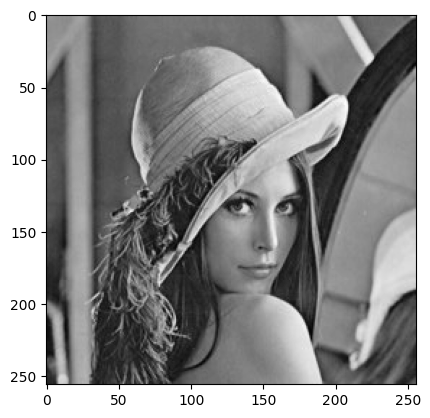

In [2]:
img = cv2.imread('./png_files/lena.png', 0)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

#### 第二步：进行数据类型转换

In [3]:
img_float = np.float32(img)

#### 第三步：使用cv2.dft进行傅里叶变化，并使用np.fft.fftshift将低频转移到图像中心

In [4]:
dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)

dft_center = np.fft.fftshift(dft)

#### 第四步：定义掩模：生成的掩模中间为1周围为0

In [11]:
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

那么我们刚刚定义的掩膜，它在频域看起来就长这个样子：

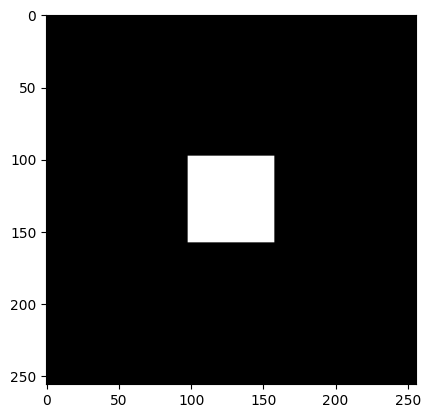

In [12]:
show_mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
show_mask = cv2.normalize(mask, mask, 0, 255, cv2.NORM_MINMAX)
plt.figure()
plt.imshow(show_mask[:,:,0], cmap='gray')
plt.show()

#### 第五步：将掩模与傅里叶变化后的图像（dft_center）相乘，保留低频部分

In [13]:
mask_img = dft_center * mask

#### 第六步：使用np.fft.ifftshift(将低频移动到原来的位置

In [14]:
img_idf = np.fft.ifftshift(mask_img)

#### 第七步：使用cv2.idft进行傅里叶的反变化

In [15]:
img_idf = cv2.idft(img_idf)
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

#### 第八步：画图，对比

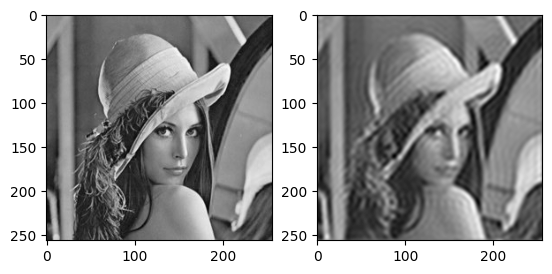

In [16]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_idf, cmap='gray')
plt.show()

#### 问：低通滤波器，把图像中的什么成分给滤除了？

------------------------------------------
## 4.7 沉浸式应用举例2：频域高通滤波

#### 第一步：把待滤波的图像读进来

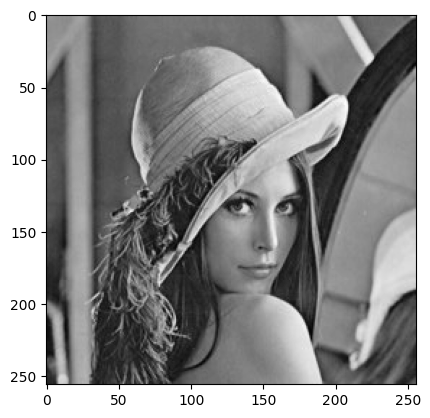

In [17]:
img = cv2.imread('./png_files/lena.png', 0)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

#### 第二步：进行数据类型转换

In [18]:
img_float = np.float32(img)

#### 第三步：使用cv2.dft进行傅里叶变化，并使用np.fft.fftshift将低频转移到图像中心

In [19]:
dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)

dft_center = np.fft.fftshift(dft)

#### 第四步：定义掩模：生成的掩模中间为0周围为1

In [20]:
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.ones((img.shape[0], img.shape[1], 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

那么我们刚刚定义的掩膜，它在频域看起来就长这个样子：

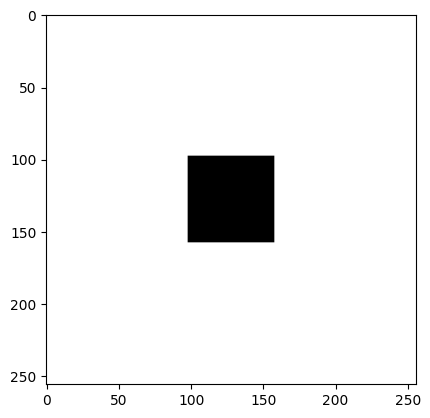

In [21]:
show_mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
show_mask = cv2.normalize(mask, mask, 0, 255, cv2.NORM_MINMAX)
plt.figure()
plt.imshow(show_mask[:,:,0], cmap='gray')
plt.show()

#### 第五步：将掩模与傅里叶变化后图像相乘，保留高频部分

In [22]:
mask_img = dft_center * mask

#### 第六步：使用np.fft.ifftshift(将低频移动到原来的位置

In [23]:
img_idf = np.fft.ifftshift(mask_img)

#### 第七步：使用cv2.idft进行傅里叶的反变化

In [24]:
img_idf = cv2.idft(img_idf)

#### 第八步：使用cv2.magnitude转化为空间域内

In [25]:
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

#### 第九步：进行绘图操作

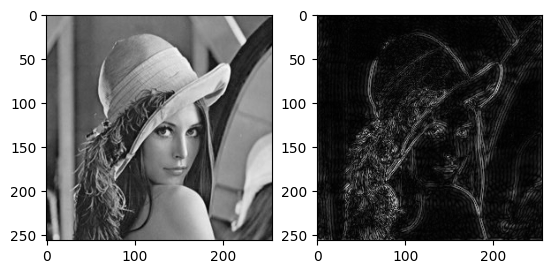

In [26]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_idf, cmap='gray')
plt.show()

#### 问：图像的高频成分，指的是图像的哪些信息？